Projet Python 2025

In [617]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("alertes_enrichies.csv")
df.tail()


,Titre Alerte,Type,Description,Lien,Date,CVE ID,Description CVE,CWE,Nature de la faille,Score CVSS,Gravité CVSS,Score EPSS,Gravité EPSS,Éditeur,Produit,Versions Affectées
35,Multiples vulnérabilités dans le noyau Linux d...,Avis,De multiples vulnérabilités ont été découverte...,https://www.cert.ssi.gouv.fr/avis/CERTFR-2026-...,"Fri, 09 Jan 2026 00:00:00 +0000",CVE-2022-49390,"In the Linux kernel, the following vulnerabili...",Non disponible,Non disponible,NaN,Non disponible,0.00036,Faible,Linux,Linux,5.4
36,Multiples vulnérabilités dans le noyau Linux d...,Avis,De multiples vulnérabilités ont été découverte...,https://www.cert.ssi.gouv.fr/avis/CERTFR-2026-...,"Fri, 09 Jan 2026 00:00:00 +0000",CVE-2023-53659,"In the Linux kernel, the following vulnerabili...",Non disponible,Non disponible,NaN,Non disponible,0.00027,Faible,Linux,Linux,5.16
37,Multiples vulnérabilités dans les produits IBM...,Avis,De multiples vulnérabilités ont été découverte...,https://www.cert.ssi.gouv.fr/avis/CERTFR-2026-...,"Fri, 09 Jan 2026 00:00:00 +0000",CVE-2025-48976,Allocation of resources for multipart headers ...,Non disponible,Allocation of resources with insufficient limits,NaN,Non disponible,0.00225,Faible,Apache Software Foundation,Apache Commons FileUpload,2.0.0-M1
38,Vulnérabilité dans Microsoft Edge (09 janvier ...,Avis,Une vulnérabilité a été découverte dans Micros...,https://www.cert.ssi.gouv.fr/avis/CERTFR-2026-...,"Fri, 09 Jan 2026 00:00:00 +0000",CVE-2025-62224,User interface (ui) misrepresentation of criti...,CWE-451,CWE-451: User Interface (UI) Misrepresentation...,5.5,Moyenne,0.00062,Faible,Microsoft,Microsoft Edge for Android,1.0.0
39,Multiples vulnérabilités dans les produits Mic...,Avis,De multiples vulnérabilités ont été découverte...,https://www.cert.ssi.gouv.fr/avis/CERTFR-2026-...,"Fri, 09 Jan 2026 00:00:00 +0000",CVE-2025-11964,"On Windows only, if libpcap needs to convert a...",CWE-787,CWE-787 Out-of-bounds Write,1.9,Faible,0.00015,Faible,The Tcpdump Group,libpcap,1.10.0


Etape 5 : Interprétation et visualisation

Lien entre score CVSS et score EPSS

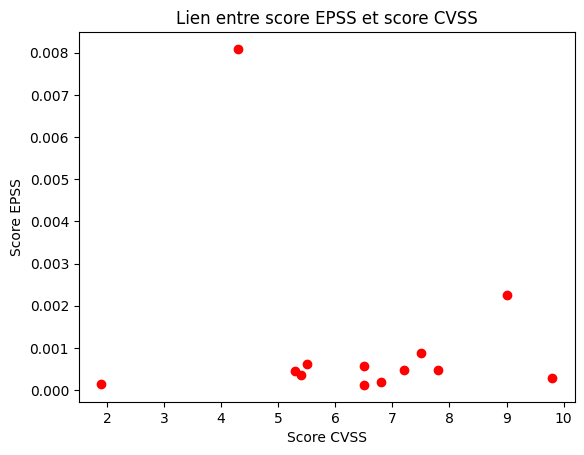

In [618]:
plt.plot(df.get("Score CVSS"), df.get("Score EPSS"), "ro")
plt.title("Lien entre score EPSS et score CVSS")
plt.xlabel("Score CVSS")
plt.ylabel("Score EPSS")
plt.show()

Nombre d'alertes par produit

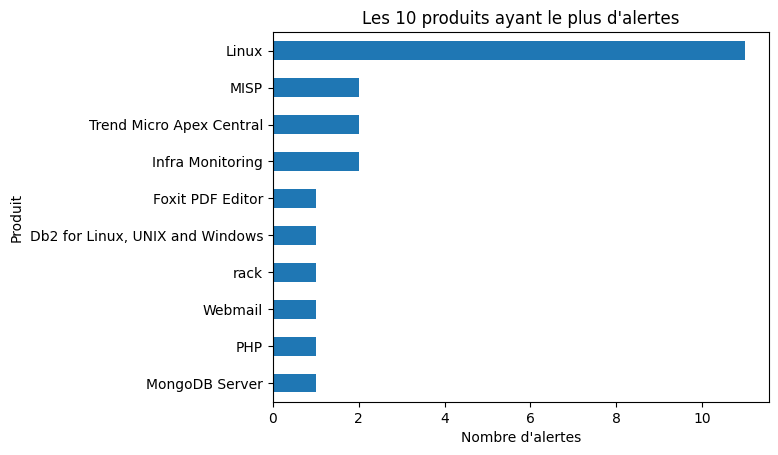

In [619]:
alertes_produit = df["Produit"].value_counts().nlargest(10)
alertes_produit.plot(kind="barh")
plt.title("Les 10 produits ayant le plus d'alertes")
plt.xlabel("Nombre d'alertes")
plt.gca().invert_yaxis()
plt.show()

Diagramme circulaire des types de vulnérabilités + détails dans un tableau

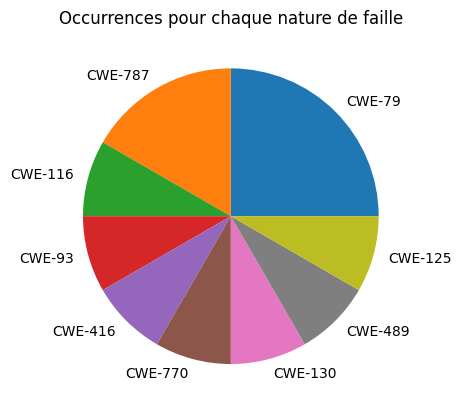

,count
Nature de la faille,
CWE-79 Improper Neutralization of Input During Web Page Generation (XSS or 'Cross-site Scripting'),2
CWE-787 Out-of-bounds Write,2
CWE-93: Improper Neutralization of CRLF Sequences ('CRLF Injection'),1
CWE-116 Improper Encoding or Escaping of Output,1
CWE-416 Use After Free,1
CWE-770 Allocation of Resources Without Limits or Throttling,1
CWE-130: Improper Handling of Length Parameter Inconsistency,1
CWE-400: Uncontrolled Resource Consumption,1
CWE-489: Active Debug Code,1


In [620]:

nb_cwe = df["CWE"].value_counts().nlargest(10)
nb_cwe = nb_cwe.drop(labels=["Non disponible"])
nb_cwe.plot(kind="pie")
plt.xlabel("")
plt.ylabel("")
plt.title("Occurrences pour chaque nature de faille")
plt.show()

nb_nature_faille = df["Nature de la faille"].value_counts()
nb_nature_faille = nb_nature_faille.drop(labels=["Non disponible"])

df_nature_faille = pd.DataFrame(nb_nature_faille)
df_nature_faille

Editeurs ayant le score EPSS le plus élevé

In [621]:
epss_editeur = df.nlargest(10, "Score EPSS")[["Éditeur", "Score EPSS"]]
epss_editeur

,Éditeur,Score EPSS
8,MongoDB Inc.,0.69622
33,NaN,0.68749
12,NaN,0.04437
19,Spring,0.00809
3,rack,0.00429
23,Veeam,0.00225
37,Apache Software Foundation,0.00225
21,MariaDB,0.00124
29,"Trend Micro, Inc.",0.00087
24,tukaani-project,0.00077
